In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Generate synthetic sinusoidal data
# t = np.linspace(0, 10, 1000)
# signal = np.sin(t)

# # Split the data into training and test sets
# train_data = t[:800]
# test_data = t[800:]

# train_labels = signal[:800]
# test_labels = signal[800:]

# # Build the neural network model
# model = Sequential([
#     Dense(50, activation='relu', input_shape=(1,)),
#     Dense(50, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# history = model.fit(train_data, train_labels, epochs=50, batch_size=32, validation_data=(test_data, test_labels))

# # Predict on test data
# predictions = model.predict(test_data)

# # Plot the original signal and predictions
# plt.figure(figsize=(14, 7))
# plt.title('Sinusoidal Function Prediction')
# plt.plot(test_data, test_labels, label='True Sinusoid', color='blue')
# plt.plot(test_data, predictions, label='Predicted Sinusoid', color='red', linestyle='--')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.show()


In [2]:
# import numpy as np
# import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import SimpleRNN, Dense

# # Generate synthetic sinusoidal data
# t = np.linspace(0, 100, 1000)
# signal = np.sin(t)

# # Create sequences for RNN
# seq_length = 50
# sequences = [signal[i:i + seq_length] for i in range(len(signal) - seq_length)]
# sequences = np.array(sequences)
# labels = signal[seq_length:]

# # Split the data into training and test sets
# train_size = int(0.8 * len(sequences))
# train_sequences = sequences[:train_size]
# train_labels = labels[:train_size]
# test_sequences = sequences[train_size:]
# test_labels = labels[train_size:]

# # Reshape the data for RNN
# train_sequences = np.reshape(train_sequences, (train_sequences.shape[0], train_sequences.shape[1], 1))
# test_sequences = np.reshape(test_sequences, (test_sequences.shape[0], test_sequences.shape[1], 1))

# # Build the RNN model
# model = Sequential([
#     SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)),
#     SimpleRNN(50, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# history = model.fit(train_sequences, train_labels, epochs=50, batch_size=32, validation_data=(test_sequences, test_labels))

# # Predict on test data
# predictions = model.predict(test_sequences)

# # Plot the true sinusoidal function and predictions
# plt.figure(figsize=(14, 7))
# plt.title('Sinusoidal Function Prediction using RNN')
# plt.plot(test_labels, label='True Sinusoid', color='blue')
# plt.plot(predictions, label='Predicted Sinusoid', color='red', linestyle='--')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [4]:
# Generate synthetic sinusoidal data
t = np.linspace(0, 100, 1000)
signal = np.sin(t)
signal.shape

(1000,)

In [58]:
sequences = []
labels = []
window_size = 150
for i in range(len(signal)):
    if i < (len(signal) - 2 * window_size):
        window = signal[i:i + window_size]
        next_window = signal[i + window_size: i + 2 * window_size]
        sequences.append(window)
        labels.append(next_window)

sequences = [e for e in sequences if len(e) == window_size]
labels = [e for e in labels if len(e) == window_size]

sequences = np.array(sequences)
labels = np.array(labels)

print(len(sequences), len(labels))

1700 1700


In [59]:
sequences.shape

(1700, 150)

In [60]:
sequences[0]

array([0.        , 0.01000484, 0.02000867, 0.0300105 , 0.04000933,
       0.05000415, 0.05999397, 0.06997778, 0.07995459, 0.08992339,
       0.09988319, 0.109833  , 0.11977181, 0.12969863, 0.13961246,
       0.14951233, 0.15939722, 0.16926617, 0.17911816, 0.18895223,
       0.19876739, 0.20856264, 0.21833702, 0.22808955, 0.23781924,
       0.24752513, 0.25720624, 0.26686161, 0.27649026, 0.28609124,
       0.29566358, 0.30520632, 0.31471851, 0.3241992 , 0.33364744,
       0.34306227, 0.35244277, 0.36178799, 0.371097  , 0.38036886,
       0.38960264, 0.39879742, 0.40795229, 0.41706632, 0.4261386 ,
       0.43516823, 0.44415429, 0.4530959 , 0.46199215, 0.47084215,
       0.47964503, 0.48839989, 0.49710587, 0.50576208, 0.51436767,
       0.52292177, 0.53142353, 0.53987209, 0.54826661, 0.55660625,
       0.56489017, 0.57311755, 0.58128756, 0.58939938, 0.59745221,
       0.60544523, 0.61337765, 0.62124866, 0.62905749, 0.63680336,
       0.64448548, 0.65210308, 0.65965541, 0.66714172, 0.67456

In [61]:
labels[0]

array([0.99754779, 0.99819808, 0.99874846, 0.99919887, 0.99954926,
       0.99979959, 0.99994984, 1.        , 0.99995006, 0.99980003,
       0.99954991, 0.99919974, 0.99874956, 0.9981994 , 0.99754932,
       0.99679938, 0.99594967, 0.99500026, 0.99395126, 0.99280276,
       0.99155488, 0.99020775, 0.9887615 , 0.98721627, 0.98557223,
       0.98382953, 0.98198835, 0.98004887, 0.97801129, 0.97587581,
       0.97364265, 0.97131203, 0.96888418, 0.96635935, 0.96373778,
       0.96101974, 0.95820551, 0.95529536, 0.95228959, 0.94918849,
       0.94599238, 0.94270158, 0.93931641, 0.93583722, 0.93226435,
       0.92859817, 0.92483903, 0.92098731, 0.91704341, 0.91300771,
       0.90888062, 0.90466255, 0.90035392, 0.89595517, 0.89146674,
       0.88688907, 0.88222262, 0.87746786, 0.87262527, 0.86769533,
       0.86267854, 0.85757539, 0.8523864 , 0.84711208, 0.84175297,
       0.8363096 , 0.83078252, 0.82517228, 0.81947943, 0.81370456,
       0.80784824, 0.80191105, 0.79589359, 0.78979647, 0.78362

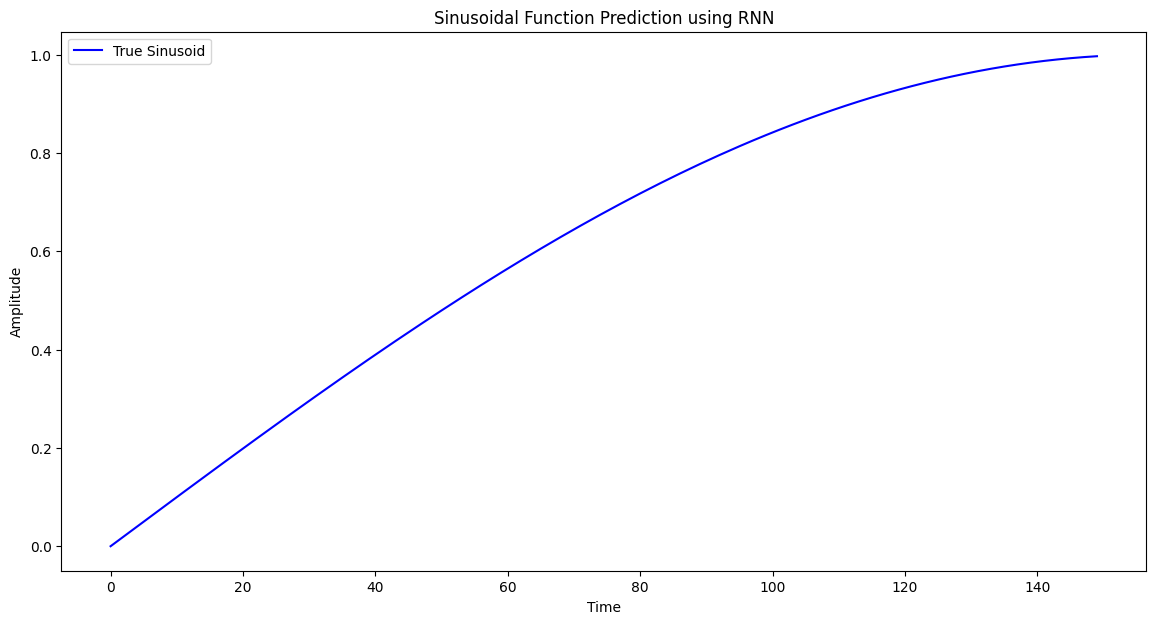

In [62]:
# Plot the true sinusoidal function and predictions
plt.figure(figsize=(14, 7))
plt.title('Sinusoidal Function Prediction using RNN')
plt.plot(signal[0:window_size], label='True Sinusoid', color='blue')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [63]:
# # Create sequences for RNN
# seq_length = 5
# sequences = [signal[i:i + seq_length] for i in range(len(signal) - seq_length)]
# sequences = np.array(sequences)
# labels = signal[seq_length:]

In [64]:
window_size

150

In [65]:
sequences.shape

(1700, 150)

In [66]:
# Split the data into training and test sets
train_size = int(0.8 * len(sequences))
train_sequences = sequences[:train_size]
train_labels = labels[:train_size]
test_sequences = sequences[train_size:]
test_labels = labels[train_size:]

# Reshape the data for RNN
train_sequences = np.reshape(train_sequences, (train_sequences.shape[0], train_sequences.shape[1], 1))
test_sequences = np.reshape(test_sequences, (test_sequences.shape[0], test_sequences.shape[1], 1))

# Build the RNN model
model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
    SimpleRNN(50, activation='relu'),
    Dense(window_size)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_sequences, train_labels, epochs=10, batch_size=32, validation_data=(test_sequences, test_labels))

Epoch 1/10


c:\Users\robert.musters.GROUPINFRA\virtualenvs\interay-ofPTlAwe-py3.12\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.4638 - val_loss: 0.2652
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2529 - val_loss: 0.2516
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2239 - val_loss: 0.1735
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1977 - val_loss: 0.1648
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1677 - val_loss: 0.1885
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.1631 - val_loss: 0.1358
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0911 - val_loss: 0.1199
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0573 - val_loss: 0.0160
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0209 - val_loss: 0.0099
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0108 - val_loss: 0.0132


In [73]:
0.8 * len(sequences)

1360.0

In [71]:
train_sequences.shape

(1360, 150, 1)

In [67]:
# Predict on test data
predictions = model.predict(test_sequences)
predictions.shape

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(340, 150)

In [68]:
predictions[0]

array([ 0.57680273,  0.5836717 ,  0.5058372 ,  0.50796   ,  0.58020186,
        0.49830553,  0.5410498 ,  0.44687343,  0.5169287 ,  0.49451685,
        0.44976944,  0.4443506 ,  0.4667642 ,  0.43242598,  0.44964412,
        0.43594295,  0.37482437,  0.3920235 ,  0.37451378,  0.372962  ,
        0.3748428 ,  0.36140585,  0.38478002,  0.3756937 ,  0.35903236,
        0.3043408 ,  0.31763   ,  0.32616532,  0.2987397 ,  0.2873037 ,
        0.24620831,  0.2059494 ,  0.25400692,  0.25887385,  0.23916024,
        0.22842595,  0.2637035 ,  0.20617005,  0.18315047,  0.19518116,
        0.17891671,  0.17959702,  0.1689652 ,  0.17765254,  0.11184201,
        0.13217324,  0.11185361,  0.16908853,  0.09449974,  0.02788118,
        0.03390256,  0.10242547,  0.03757329, -0.01876836,  0.09407632,
        0.02390394,  0.00923115, -0.0317381 , -0.03362131, -0.0275326 ,
        0.02955736, -0.02140682, -0.03157278, -0.10295945, -0.06860447,
       -0.11006597, -0.0563939 , -0.10758035, -0.11709552, -0.12

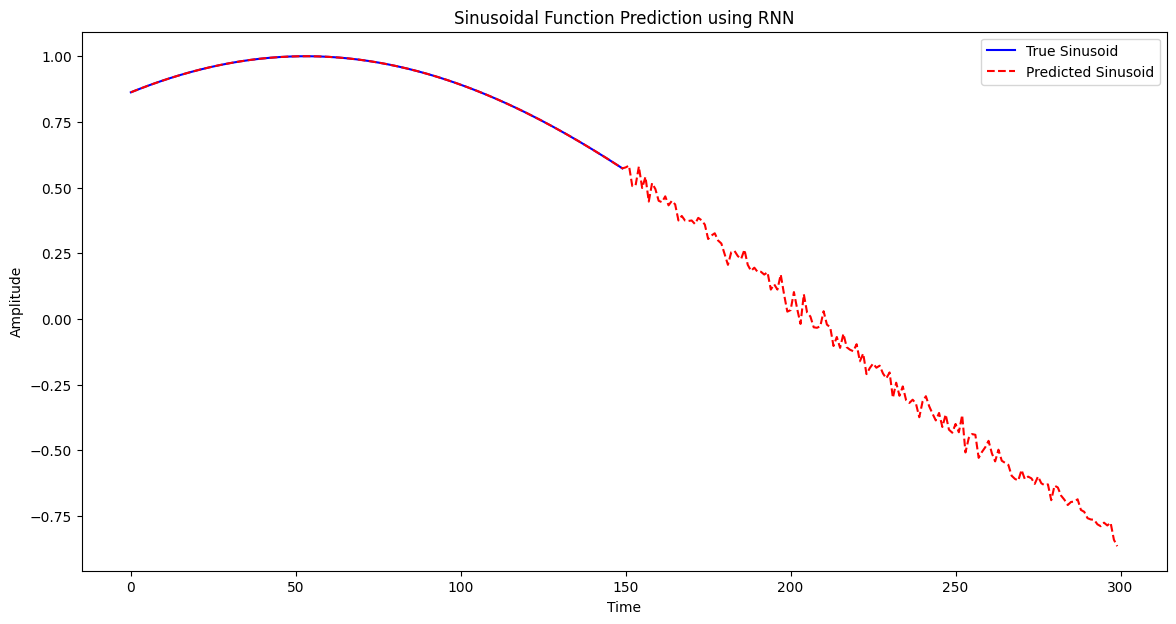

In [69]:
# Plot the true sinusoidal function and predictions
true_signal = test_sequences[0].reshape(-1)
predicted_next_part_of_signal = np.append(true_signal, predictions[0].reshape(-1))
plt.figure(figsize=(14, 7))
plt.title('Sinusoidal Function Prediction using RNN')
plt.plot(true_signal, label='True Sinusoid', color='blue')
plt.plot(predicted_next_part_of_signal, label='Predicted Sinusoid', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

# Bonus
Use prediction to generate new prediction

In [74]:
predictions[0].shape

(150,)

In [76]:
predictions[0].reshape(1,150,1).shape

(1, 150, 1)

In [77]:
# Predict on test data
next_prediction = model.predict(predictions[0].reshape(1,window_size,1))
next_prediction.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


(1, 150)

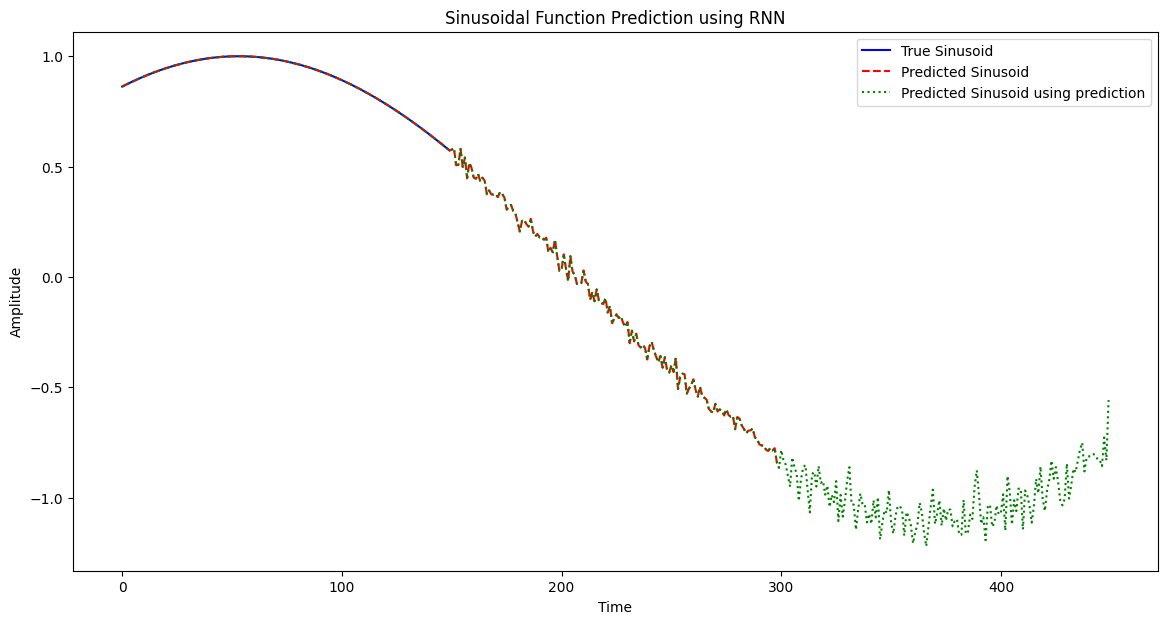

In [84]:
# Plot the true sinusoidal function and predictions
true_signal = test_sequences[0].reshape(-1)
predicted_next_part_of_signal = np.append(true_signal, predictions[0].reshape(-1))
predicted_next_next_part_of_signal = np.append(predicted_next_part_of_signal, next_prediction)
plt.figure(figsize=(14, 7))
plt.title('Sinusoidal Function Prediction using RNN')
plt.plot(true_signal, label='True Sinusoid', color='blue')
plt.plot(predicted_next_part_of_signal, label='Predicted Sinusoid', color='red', linestyle='--')
plt.plot(predicted_next_next_part_of_signal, label='Predicted Sinusoid using prediction', color='green', linestyle='dotted')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [52]:
test_sequences[0].reshape(-1)

array([-0.21823032, -0.22798309, -0.23771304, -0.24741919, -0.25710058])

In [ ]:
Inferencing door Tflite